In [82]:
import os.path
import csv
import numpy as np
import scipy.spatial
import pandas as pd

In [121]:
folder_name = "prepared_corpora/msrp_testing/"
os.chdir(folder_name)

In [122]:
!ls


10_semantic_corruptions.txt  5_semantic_corruptions.txt  microsoft_ids.txt
1_semantic_corruptions.txt   6_semantic_corruptions.txt  paraphrases.txt
2_semantic_corruptions.txt   7_semantic_corruptions.txt  phrase_embeddings.csv
3_semantic_corruptions.txt   8_semantic_corruptions.txt  phrases-backup.txt
4_semantic_corruptions.txt   9_semantic_corruptions.txt  phrases.txt


In [138]:
def make_dummy_embeddings(embedding_size):

    with open("phrases.txt",'r') as phrases_fh:
        n_phrases = len(phrases_fh.readlines())
        print(n_phrases)
        dummy_embeddings = 10*np.random.randn(n_phrases,embedding_size) + 5*np.random.rand(n_phrases,embedding_size)
        np.savetxt("phrase_embeddings.csv",dummy_embeddings, delimiter=",")
        
make_dummy_embeddings(200)        

10204


In [139]:
def embedding_distance(embeddings, id1, id2):
    ii = id1 - 1  #Change from 1 indexed id, to 0 indexex embedding index
    jj = id2 - 1
    
    return scipy.spatial.distance.cosine(embeddings[ii,:], embeddings[jj,:])

In [140]:
def load_link_distances(link_filename, embeddings):
    links = np.loadtxt(link_filename, delimiter=",",skiprows=1, dtype=np.int)
    dists = pd.Series()
    for link in links:
        assert(len(link)==2)
        phrase_id = link[0]
        var_phrase_id = link[1]
        
        dists.loc[phrase_id] = embedding_distance(embeddings, phrase_id, var_phrase_id)
    return dists



In [141]:
def get_dists_table(max_corruption = 10):
    embeddings = np.loadtxt("phrase_embeddings.csv", delimiter=",")
    dists = pd.DataFrame()
    dists["paraphrase"] = load_link_distances("paraphrases.txt", embeddings)
    for corruption_level in range(1,max_corruption+1):
        link_filename = str(corruption_level)+"_semantic_corruptions.txt"
        dists[str(corruption_level)] = load_link_distances(link_filename, embeddings)
        
    

In [142]:
dists

,paraphrase,1,2,3,4,5,6,7,8,9,10
1,0.839353,0.904344,0.976465,0.888052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.839353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.093153,1.128462,1.067110,0.909869,0.968467,1.020967,0.982571,NaN,NaN,NaN,NaN
13,1.093153,0.881703,1.058599,0.979849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.989413,0.912859,1.005934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.989413,1.073335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1.032851,1.095940,1.090978,0.896284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1.032851,0.982490,0.970187,1.035336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.044229,0.926446,0.959119,1.054117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,1.044229,1.021062,1.033289,1.027501,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 15, 15

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb811e695f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8116f5438>]], dtype=object)

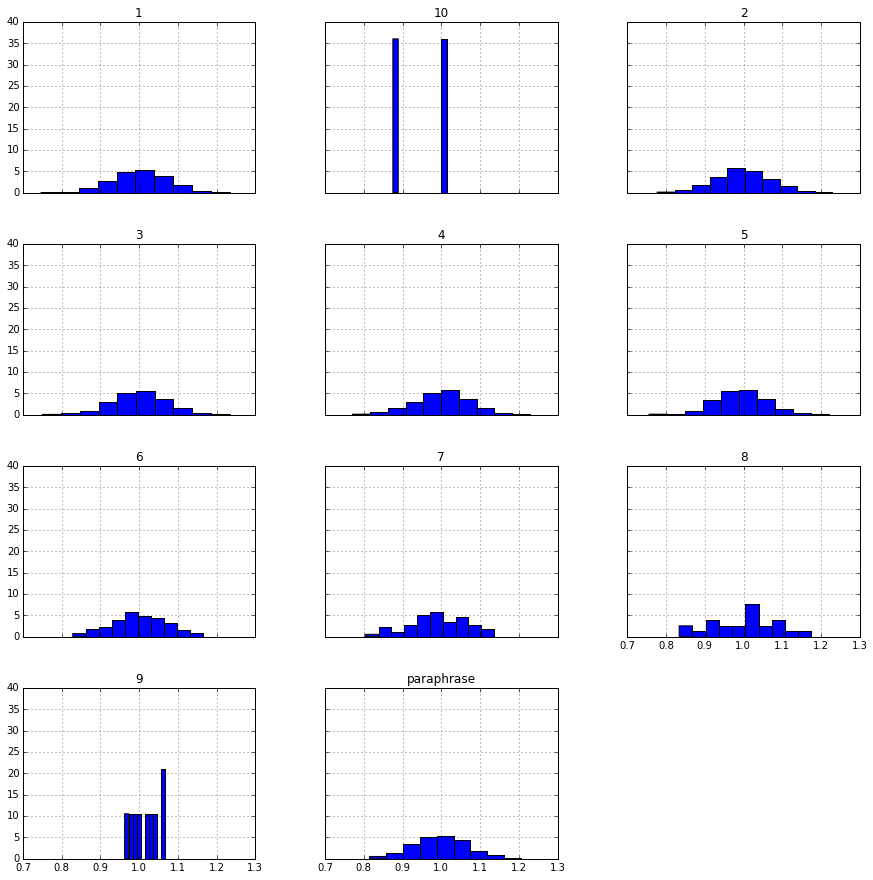

In [163]:
dists.hist(sharex=True, sharey=True, normed=True)